In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os, sys
import numpy as np 
# import pandas as pd 
import matplotlib.pyplot as plt
# import geopandas as gpd
sys.path.append('../src/')
sys.path.append('../content/')
import data_utils as du
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
# import shapely
# from tqdm import tqdm, tqdm_notebook
# import ast, shutil

## Download EO data from Google Earth Engine via API

*API key required:* assuming a file `content/api_keys.py` that just contains the line `GEE_API = '<key>'`

In [4]:
import ee, geemap
import api_keys

ee.Authenticate()
ee.Initialize(project=api_keys.GEE_API)
geemap.ee_initialize()

In [126]:
# tmp = du.get_gee_image_from_point(tmp_coords_list[0], image_collection='dynamicworld')
# # tmp = du.download_gee_image(tmp_coords_list[0], name='tmp-dynamicworld', image_collection='dynamicworld', resize_image=True)
# tmp.getInfo()

In [93]:
tmp_coords_list = [(-5.829883, 54.248818),
                (-4.247973, 51.627768),
                (-4.05749, 52.521469),
                (-1.226506, 50.891421),
                (-2.361399, 52.385976),
                (-1.554099, 50.830184),
                (-0.208709, 51.842453),
                (1.005961, 51.331986),
                (-0.828484, 50.888106),
                (-1.420833, 52.403092)]

# tmp = du.download_gee_image(tmp_coords_list[0], name='tmp-dynamicworld', image_collection='dynamicworld', resize_image=True)

# du.download_list_coord(coord_list=tmp_coords_list, name_group='pecl-fig')

for ii, tmp_coords in enumerate(tmp_coords_list):
    im, path_im = du.download_gee_image(coords=tmp_coords, name=f'pecl-fig-{ii}',  verbose=0,
                                        path_save='../content/sample_data',
                                                image_collection='dynamicworld')

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-0_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-1_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-2_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-3_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-4_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-5_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/repos/NeurEO/content/sample_data/pecl-fig-6_dynamicworld_y-2024.tif
Generating URL ...
Please wait ...
Data downloaded to /

In [96]:
## save to txt file:

with open('coords_pecl-fig.txt', 'w') as f:
    for coords in tmp_coords_list:
        f.write(f"{coords}\n")

In [46]:
du.download_gee_image(coords=tmp_coords, name='sample-0', image_collection='alphaearth')

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif


(<xarray.DataArray (band: 64, y: 128, x: 128)>
 [1048576 values with dtype=float64]
 Coordinates:
   * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
   * x            (x) float64 5.759e+05 5.76e+05 5.76e+05 ... 5.772e+05 5.772e+05
   * y            (y) float64 6.012e+06 6.012e+06 ... 6.014e+06 6.014e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:           Area
     TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
     TIFFTAG_XRESOLUTION:     1
     TIFFTAG_YRESOLUTION:     1
     _FillValue:              -inf
     scale_factor:            1.0
     add_offset:              0.0,
 '/Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif')

# Plot data

Counter({0: 7695, 1: 4135, 2: 2585, 6: 1547, 7: 422})


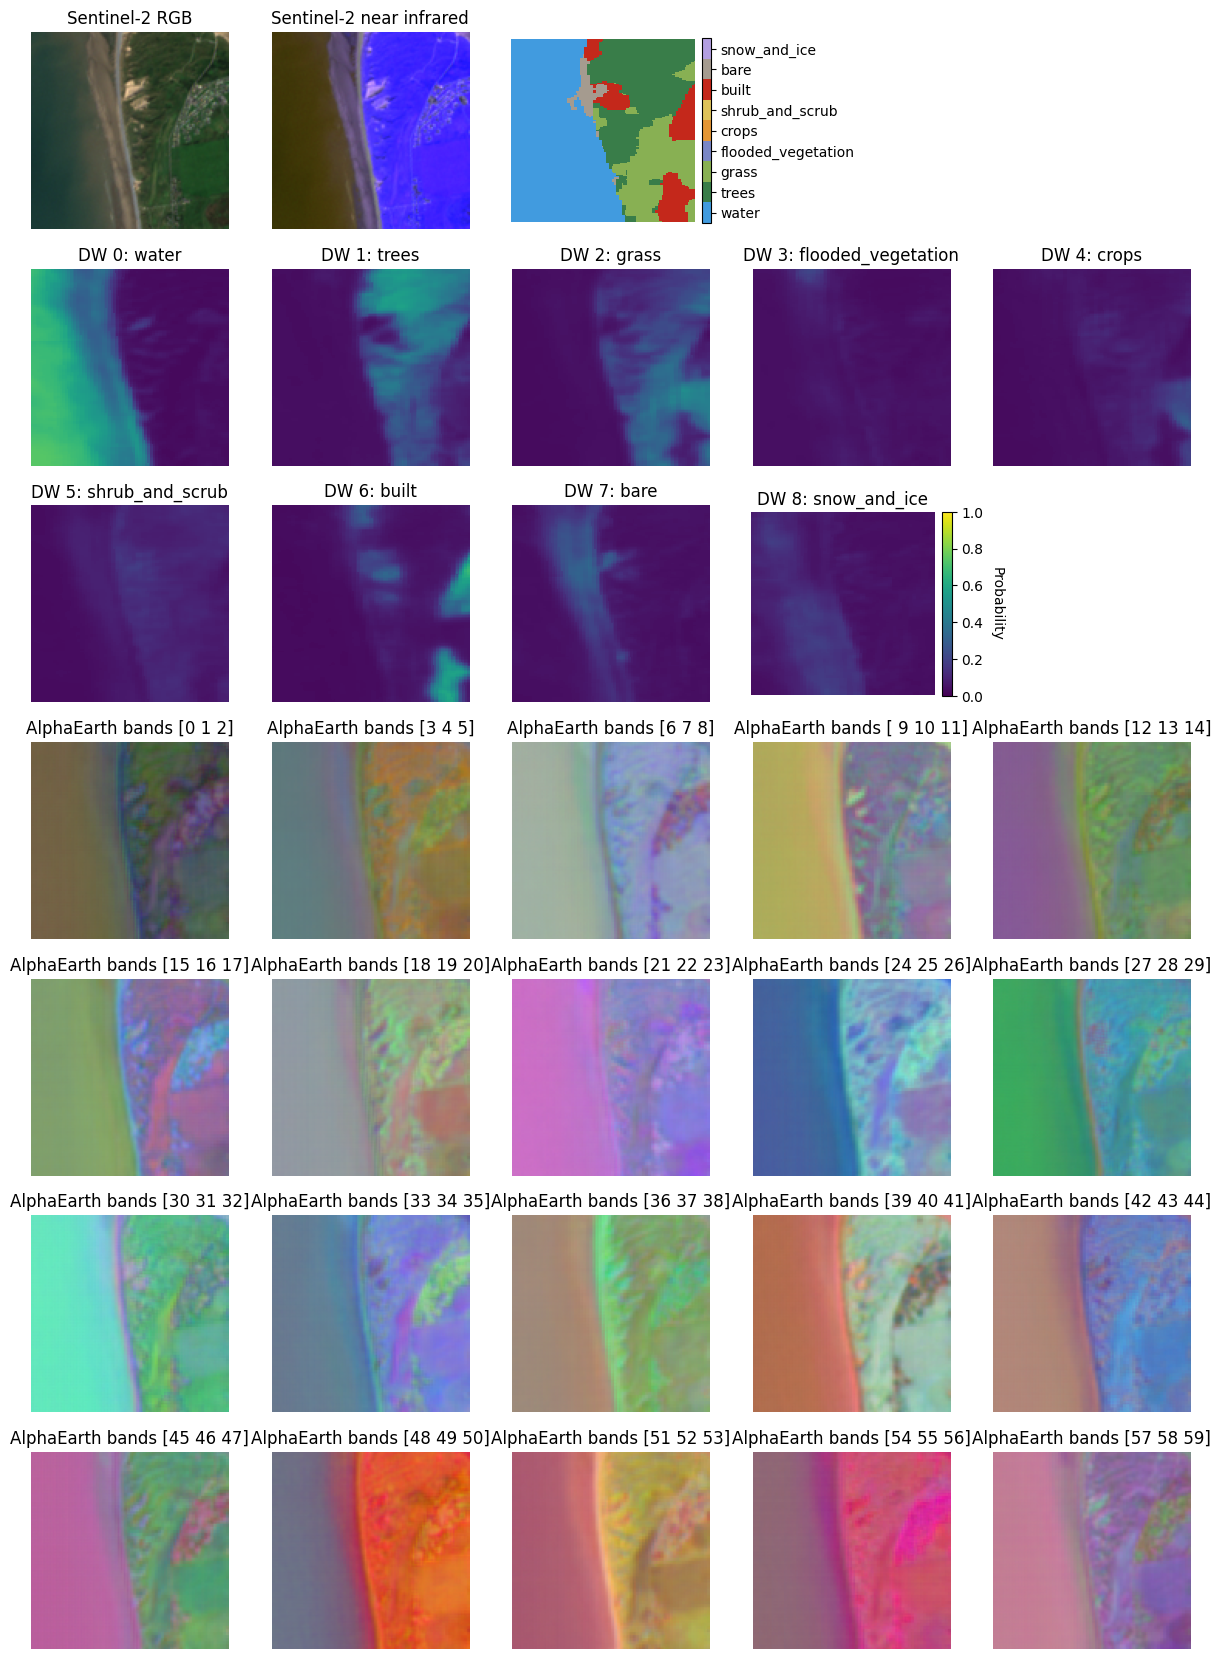

In [125]:
du.plot_overview_images('../content/sample_data', name='pecl-fig-2', plot_alphaearth=True, plot_dynamicworld_full=True)

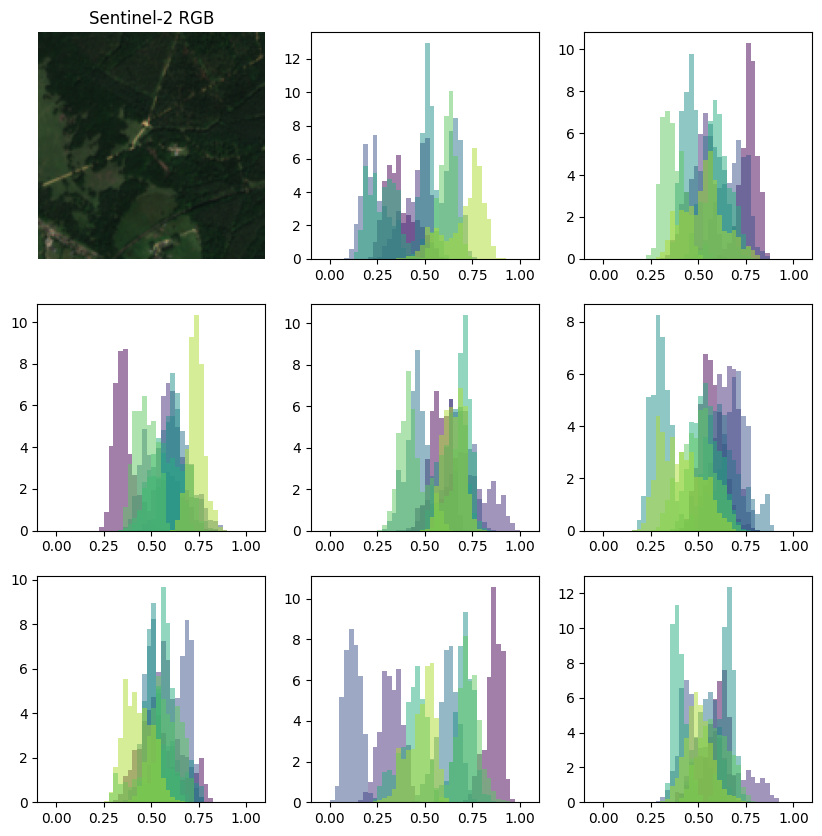

In [13]:
du.plot_distr_embeddings('../content/sample_data', name='pecl-fig-5')

In [91]:
# ## Correlation of each alpha earth band with each sentinel-2 band
# correlation_matrix = np.zeros((im_plot_alpha.shape[0], im_plot_s2.shape[0]))
# for i in range(im_plot_alpha.shape[0]):
#     for j in range(im_plot_s2.shape[0]):
#         band_alpha = im_loaded_alpha[i, ...].values.flatten()
#         band_s2 = im_plot_s2[j, ...].values.flatten()
#         correlation_matrix[i, j] = np.corrcoef(band_alpha, band_s2)[0, 1]

# import seaborn as sns
# sns.scatterplot(correlation_matrix) 

In [93]:
# corr_mat_alpha = np.zeros((im_plot_alpha.shape[0], im_plot_alpha.shape[0]))
# for i in range(im_plot_alpha.shape[0]): 
#     for j in range(im_plot_alpha.shape[0]):
#         band_alpha_i = im_loaded_alpha[i, ...].values.flatten()
#         band_alpha_j = im_loaded_alpha[j, ...].values.flatten()
#         corr_mat_alpha[i, j] = np.corrcoef(band_alpha_i, band_alpha_j)[0, 1]
# # sns.heatmap(corr_mat_alpha, )
# plt.imshow(corr_mat_alpha, cmap='coolwarm', vmin=-1, vmax=1)